In [63]:
import sys

sys.path.append("..")

In [64]:
from src.fem_1d_eigen import *
import importlib
import src.fem_1d_eigen
from scipy.linalg import eigh, eig
from scipy.sparse.linalg import eigsh
from scipy.constants import hbar, m_e, eV, epsilon_0, e
import matplotlib.pyplot as plt
import numpy as np

importlib.reload(src.fem_1d_eigen)

<module 'src.fem_1d_eigen' from '/home/yamamoto/physics/fem/fem_schrodinger/examples/../src/fem_1d_eigen.py'>

In [65]:
xs = np.linspace(1e-20, 1e-9, 4000)
xs = np.array([0, 1, 2, 3, 4])
v = np.ones_like(xs)
# v = -1 / xs
femeig = Fem1dEigen(xs, v)
K = femeig.get_K()
M = femeig.get_M()
V = femeig.get_V()
K_dirichlet = K[1:-1, 1:-1]
M_dirichlet = M[1:-1, 1:-1]
V_dirichlet = V[1:-1, 1:-1]
k = 3
# C0 = hbar**2 / (m_e)
# C1 = e**2 / (4 * np.pi * epsilon_0)
C0 = 1
C1 = 1
# val, vec = eigsh(
#    -1 / 2 * C0 * K_dirichlet + C1 * V_dirichlet,
#    k=k,
#    M=M_dirichlet,
#    which="LA",
#    sigma=-20 * eV,
# )
val, vec = eig(
    -1 / 2 * C0 * K_dirichlet + C1 * V_dirichlet,
    M_dirichlet,
)

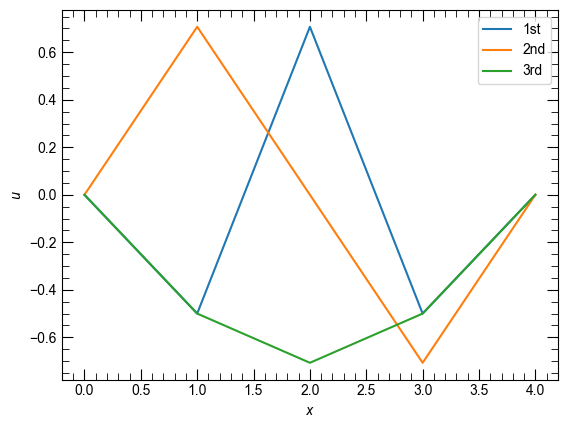

In [66]:
vec_0 = np.insert(vec, 0, 0, axis=0)
vec_0_m1 = np.insert(vec_0, vec_0.shape[0], 0, axis=0)
fig, ax = plt.subplots()
ax.plot(xs, vec_0_m1[:, 0], label="1st")
ax.plot(xs, vec_0_m1[:, 1], label="2nd")
ax.plot(xs, vec_0_m1[:, 2], label="3rd")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")
fig.savefig("figs/eigenfunction.pdf")

In [74]:
vals = []
part1 = np.arange(10, 100, 10)
part2 = np.arange(100, 1000, 100)
combined = np.concatenate((part1, part2))
for i in combined:
    print(i)
    # xs = np.linspace(1e-20, 1e-9, i)
    xs = np.linspace(0, 1, i)
    # v = -1 / xs
    # v = np.zeros_like(xs)
    v = np.ones_like(xs)
    femeig = Fem1dEigen(xs, v)
    K = femeig.get_K()
    M = femeig.get_M()
    V = femeig.get_V()
    K_dirichlet = K[1:-1, 1:-1]
    M_dirichlet = M[1:-1, 1:-1]
    V_dirichlet = V[1:-1, 1:-1]
    val, vec = eigsh(
        -1 / 2 * C0 * K_dirichlet + C1 * V_dirichlet,
        k=1,
        M=M_dirichlet,
        which="LM",
        sigma=-20 * eV,
    )
    vals.append(val)

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900


In [75]:
K

array([[ -899.,   899.,     0., ...,     0.,     0.,     0.],
       [  899., -1798.,   899., ...,     0.,     0.,     0.],
       [    0.,   899., -1798., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ..., -1798.,   899.,     0.],
       [    0.,     0.,     0., ...,   899., -1798.,   899.],
       [    0.,     0.,     0., ...,     0.,   899.,  -899.]])

In [76]:
K_dirichlet

array([[-1798.,   899.,     0., ...,     0.,     0.,     0.],
       [  899., -1798.,   899., ...,     0.,     0.,     0.],
       [    0.,   899., -1798., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ..., -1798.,   899.,     0.],
       [    0.,     0.,     0., ...,   899., -1798.,   899.],
       [    0.,     0.,     0., ...,     0.,   899., -1798.]])

In [77]:
np.array(vals)

array([[5.9851107 ],
       [5.94605539],
       [5.93963014],
       [5.93747123],
       [5.93649286],
       [5.93596827],
       [5.93565475],
       [5.93545257],
       [5.93531462],
       [5.93521633],
       [5.93490469],
       [5.9348476 ],
       [5.93482769],
       [5.9348185 ],
       [5.93481351],
       [5.93481051],
       [5.93480856],
       [5.93480722]])

[0.39867831]


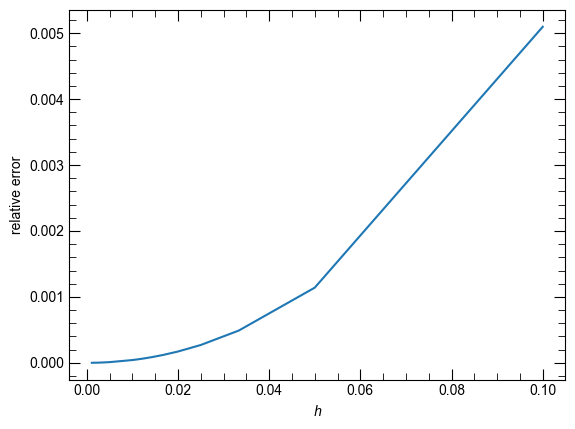

In [80]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.abs(np.pi**2 / 2 + 1 - np.array(vals)) / (np.pi**2))
ax.set_xlabel("$h$")
ax.set_ylabel("relative error")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("figs/convergence.pdf")

[0.39867831]


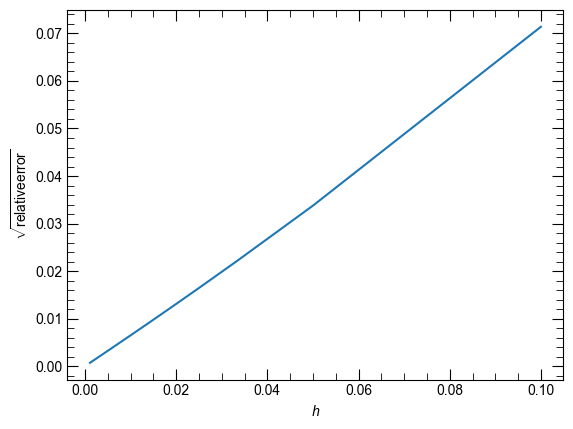

In [81]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.sqrt(np.abs(np.pi**2/2 + 1 - np.array(vals)) / (np.pi**2)))
ax.set_xlabel("$h$")
ax.set_ylabel(r"$\sqrt{\mathrm{relative error}}$")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("figs/convergence_sqrt.pdf")